# Projeto de Business Analytics - Atacarejo

## Previsão de Vendas Acumuladas

### Objetivo:
#### Analisar, tratar e processar dados e criar modelo de Machine Learning para previsão de vendas
#### O resultado será a previsão de vendas por produto e por loja

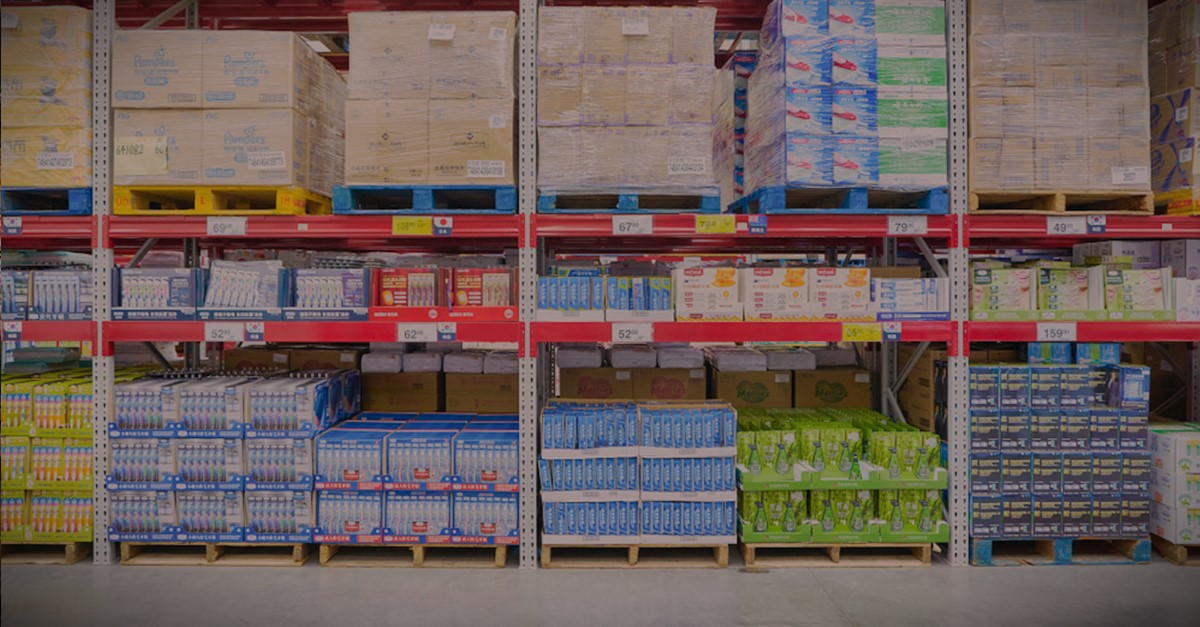

In [1]:
from IPython.display import Image
Image('atacarejo.jpg')

In [2]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

# importar os módulos de sistema
import math
import sys, os

# Modulos especiais para tratamento de dados
sys.path.append(os.path.abspath(os.path.join('00')))
import estrategia1
import estrategia2
import estrategia3
import preditiva

Author: Data Science Academy

sys       : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
seaborn   : 0.12.2
numpy     : 1.23.5
pandas    : 1.5.3
matplotlib: 3.7.1



## Importação dos Dados

In [3]:
# dados
df = pd.read_csv('dados/dados.csv')

In [4]:
# tamanho
df.shape

(14204, 12)

In [5]:
#amostra
df.sample(5)

,id_prod,peso_prod,teor_gordura,area_exib,categoria,preco,id_loja,ano_abertura,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
12932,FDG_59,NaN,LOW FAT,0.075698,ALIMENTOS COM AMIDO,37.2164,OUT_019,1985,PEQUENA,NÍVEL_1,MERCEARIA,NaN
10917,FDA_57,18.85,LOW FAT,0.039705,APERITIVOS,40.3480,OUT_049,1999,MÉDIA,NÍVEL_1,TIPO_1,NaN
12488,DRM_48,15.20,LOW FAT,0.112803,REFRIGERANTES,35.8848,OUT_013,1987,GRANDE,NÍVEL_3,TIPO_1,NaN
7568,DRK_37,5.00,LF,0.000000,REFRIGERANTES,190.4530,OUT_010,1998,NaN,NÍVEL_3,MERCEARIA,379.506
7510,FDV_57,15.25,REGULAR,0.000000,APERITIVOS,179.7660,OUT_018,2009,MÉDIA,NÍVEL_3,TIPO_2,3056.022


## Verificar qualidade dos dados

In [6]:
# valores ausentes
estrategia1.func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 12 colunas.
Encontrado: 3 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
qtd_vendas,5681,40.00,float64
tam_loja,4016,28.27,object
peso_prod,2439,17.17,float64


### Observações:
- Tratar os valores ausentes. Correspondem a um problema.
- Separar 2 datasets. Onde a coluna 'qtd_vendas' é NaN considerar dataset para prever os dados de quantidade de vendas.
- Imputar dados nas outras 2 colunas.

In [7]:
# identificar as lojas pelo seu tamanho
df[['tam_loja','id_loja']].value_counts(dropna=False)

tam_loja  id_loja
MÉDIA     OUT_027    1559
GRANDE    OUT_013    1553
MÉDIA     OUT_049    1550
PEQUENA   OUT_035    1550
          OUT_046    1550
NaN       OUT_045    1548
MÉDIA     OUT_018    1546
NaN       OUT_017    1543
          OUT_010     925
PEQUENA   OUT_019     880
dtype: int64

In [8]:
# contar registros NaN
len(df.loc[df['tam_loja'].isnull(), 'id_loja'])

4016

In [9]:
# conferir quais lojas estão sem informação de tamanho
len(df.loc[df['id_loja'].isin(['OUT_045', 'OUT_017', 'OUT_010'])])

4016

A área de negócio informou que as lojas sem informações sw tamanho são lojas médias

In [10]:
# imputar valores
df['tam_loja'].fillna('MÉDIA', inplace=True)

In [11]:
# reconferir valores ausentes
estrategia1.func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 12 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
qtd_vendas,5681,40.00,float64
peso_prod,2439,17.17,float64


In [12]:
# identificar produtos sem peso. criar dataframe de produtos e pesos
df_pesos = df[['id_prod', 'peso_prod']]
df_pesos

,id_prod,peso_prod
0,FDA_15,9.30
1,DRC_01,5.92
2,FDN_15,17.50
3,FDX_07,19.20
4,NCD_19,8.93
...,...,...
14199,FDB_58,10.50
14200,FDD_47,7.60
14201,NCO_17,10.00
14202,FDJ_26,15.30


In [13]:
# apagar registros NaN
estrategia1.drop_rows_with_missing_values(df_pesos)

2439 linhas contendo valores ausentes foram descartadas.


In [14]:
# apagar produtos duplicados
estrategia1.drop_duplicates(df_pesos)

10206 linhas duplicadas foram encontradas e removidas.


In [15]:
# amostra de produtos e pesos
df_pesos

,id_prod,peso_prod
0,FDA_15,9.300
1,DRC_01,5.920
2,FDN_15,17.500
3,FDX_07,19.200
4,NCD_19,8.930
...,...,...
8471,NCT_53,5.400
8582,FDE_52,10.395
8919,FDN_52,9.395
8963,FDQ_60,6.195


In [16]:
# apagar coluna peso dom dataframe principal
df = df.drop('peso_prod', axis=1)

In [17]:
# imputar nova coluna de pesos no dataframe principal
df = df.merge(df_pesos, on='id_prod', how='left')

In [18]:
# verificar valores ausentes
estrategia1.func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 12 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
qtd_vendas,5681,40.0,float64


In [19]:
# colunas
df.columns

Index(['id_prod', 'teor_gordura', 'area_exib', 'categoria', 'preco', 'id_loja',
       'ano_abertura', 'tam_loja', 'tipo_cidade', 'tipo_loja', 'qtd_vendas',
       'peso_prod'],
      dtype='object')

In [20]:
# reordenar colunas
df = df[['id_prod', 'categoria', 'teor_gordura', 'peso_prod', 'preco', 'area_exib', 'id_loja',
         'ano_abertura', 'tam_loja', 'tipo_cidade', 'tipo_loja', 'qtd_vendas']]

In [21]:
# amostra do dataframe principal
df

,id_prod,categoria,teor_gordura,peso_prod,preco,area_exib,id_loja,ano_abertura,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDA_15,LATICÍNIOS,LOW FAT,9.30,249.8092,0.016047,OUT_049,1999,MÉDIA,NÍVEL_1,TIPO_1,3735.1380
1,DRC_01,REFRIGERANTES,REGULAR,5.92,48.2692,0.019278,OUT_018,2009,MÉDIA,NÍVEL_3,TIPO_2,443.4228
2,FDN_15,CARNES,LOW FAT,17.50,141.6180,0.016760,OUT_049,1999,MÉDIA,NÍVEL_1,TIPO_1,2097.2700
3,FDX_07,FRUTAS E VERDURAS,REGULAR,19.20,182.0950,0.000000,OUT_010,1998,MÉDIA,NÍVEL_3,MERCEARIA,732.3800
4,NCD_19,CASA,LOW FAT,8.93,53.8614,0.000000,OUT_013,1987,GRANDE,NÍVEL_3,TIPO_1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB_58,APERITIVOS,REGULAR,10.50,141.3154,0.013496,OUT_046,1997,PEQUENA,NÍVEL_1,TIPO_1,NaN
14200,FDD_47,ALIMENTOS COM AMIDO,REGULAR,7.60,169.1448,0.142991,OUT_018,2009,MÉDIA,NÍVEL_3,TIPO_2,NaN
14201,NCO_17,SAÚDE E HIGIENE,LOW FAT,10.00,118.7440,0.073529,OUT_045,2002,MÉDIA,NÍVEL_2,TIPO_1,NaN
14202,FDJ_26,ENLATADOS,REGULAR,15.30,214.6218,0.000000,OUT_017,2007,MÉDIA,NÍVEL_2,TIPO_1,NaN


In [22]:
# análise das variáveis numéricas
df[['peso_prod', 'preco', 'area_exib', 'qtd_vendas']].describe()

,peso_prod,preco,area_exib,qtd_vendas
count,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,141.004977,0.065953,2181.288914
std,4.651716,62.086938,0.051459,1706.499616
min,4.555000,31.290000,0.000000,33.290000
25%,8.710000,94.012000,0.027036,834.247400
50%,12.600000,142.247000,0.054021,1794.331000
75%,16.750000,185.855600,0.094037,3101.296400
max,21.350000,266.888400,0.328391,13086.964800


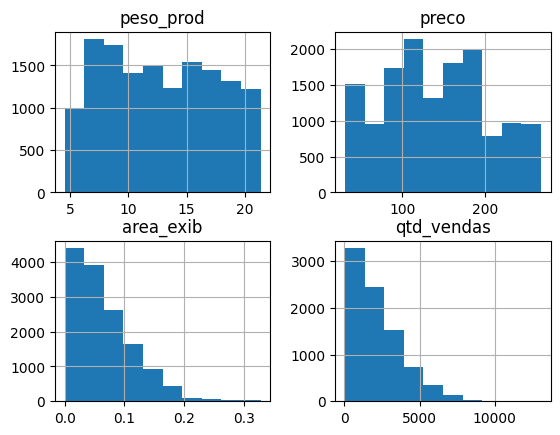

In [23]:
# histograma
df[['peso_prod', 'preco', 'area_exib', 'qtd_vendas']].hist();

In [24]:
# verificar a normalidade das distribuições

# Estatística
import scipy
from scipy.stats import normaltest

# Loop
for i in df[['peso_prod', 'preco', 'area_exib', 'qtd_vendas']].columns:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar p-valor
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

peso_prod : Distribuição Não Normal
preco : Distribuição Não Normal
area_exib : Distribuição Não Normal
qtd_vendas : Distribuição Não Normal


Iremos transofrmar as colunas 'peso_prod', 'preco', 'area_exib' em colunas categóricas:
- 'peso_prod' considerar 4 categorias sendo: '<6kg', '6 a 12kg', '12 a 18kg' e '>18kg'
- 'preco' considerar 5 categorias sendo: '<50', '50 a 100', '100 a 150', '150 a 200', '200 a 250' e '>250'
- 'area_exib' considerar 3 categorias sendo: '<0.03', '0.03 a 0.1' e '>0.1'
- 'qtd_vendas' deixar como numérico pois é o target a prever

In [25]:
# criar coluna 'peso_prod_kg'
bins = [0, 6, 12, 18, float('inf')]  # Definir os limites das categorias em kg
labels = ['< 6', '6 a 12', '12 a 18', '> 18']  # Definir as etiquetas das categorias
df['peso_prod_kg'] = pd.cut(df['peso_prod'], bins=bins, labels=labels, right=False)

In [26]:
# criar coluna 'preco_R$'
bins = [0, 50, 100, 150, 200, 250, float('inf')]  # Definir os limites das categorias em R$
labels = ['< 50', '50 a 100', '100 a 150', '150 a 200', '200 a 250', '> 250']  # Definir as etiquetas das categorias
df['preco_R$'] = pd.cut(df['preco'], bins=bins, labels=labels, right=False)

In [27]:
# criar coluna 'area_exib_m2'
bins = [0, 0.03, 0.1, float('inf')]  # Definir os limites das categorias em m²
labels = ['< 0.03', '0.03 a 0.1', '> 0.1']  # Definir as etiquetas das categorias
df['area_exib_m2'] = pd.cut(df['area_exib'], bins=bins, labels=labels, right=False)

In [28]:
# colunas
df.columns

Index(['id_prod', 'categoria', 'teor_gordura', 'peso_prod', 'preco',
       'area_exib', 'id_loja', 'ano_abertura', 'tam_loja', 'tipo_cidade',
       'tipo_loja', 'qtd_vendas', 'peso_prod_kg', 'preco_R$', 'area_exib_m2'],
      dtype='object')

In [29]:
# reorganizar colunas
df = df[['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$', 'area_exib_m2',
    'id_loja', 'ano_abertura', 'tam_loja', 'tipo_cidade','tipo_loja', 'qtd_vendas']]

In [30]:
# amostra
df

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,ano_abertura,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDA_15,LATICÍNIOS,LOW FAT,6 a 12,200 a 250,< 0.03,OUT_049,1999,MÉDIA,NÍVEL_1,TIPO_1,3735.1380
1,DRC_01,REFRIGERANTES,REGULAR,< 6,< 50,< 0.03,OUT_018,2009,MÉDIA,NÍVEL_3,TIPO_2,443.4228
2,FDN_15,CARNES,LOW FAT,12 a 18,100 a 150,< 0.03,OUT_049,1999,MÉDIA,NÍVEL_1,TIPO_1,2097.2700
3,FDX_07,FRUTAS E VERDURAS,REGULAR,> 18,150 a 200,< 0.03,OUT_010,1998,MÉDIA,NÍVEL_3,MERCEARIA,732.3800
4,NCD_19,CASA,LOW FAT,6 a 12,50 a 100,< 0.03,OUT_013,1987,GRANDE,NÍVEL_3,TIPO_1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB_58,APERITIVOS,REGULAR,6 a 12,100 a 150,< 0.03,OUT_046,1997,PEQUENA,NÍVEL_1,TIPO_1,NaN
14200,FDD_47,ALIMENTOS COM AMIDO,REGULAR,6 a 12,150 a 200,> 0.1,OUT_018,2009,MÉDIA,NÍVEL_3,TIPO_2,NaN
14201,NCO_17,SAÚDE E HIGIENE,LOW FAT,6 a 12,100 a 150,0.03 a 0.1,OUT_045,2002,MÉDIA,NÍVEL_2,TIPO_1,NaN
14202,FDJ_26,ENLATADOS,REGULAR,12 a 18,200 a 250,< 0.03,OUT_017,2007,MÉDIA,NÍVEL_2,TIPO_1,NaN


In [31]:
# checar categorias da coluna 'teor_gordura'
df['teor_gordura'].value_counts()

LOW FAT    8663
REGULAR    4824
LF          522
REG         195
Name: teor_gordura, dtype: int64

In [32]:
# substituir categorias repetidas
df['teor_gordura'].replace({'LF': 'LOW FAT', 'REG': 'REGULAR'}, inplace=True)

In [33]:
# checar categorias da coluna 'teor_gordura'
df['teor_gordura'].value_counts()

LOW FAT    9185
REGULAR    5019
Name: teor_gordura, dtype: int64

In [34]:
# checar categoria ano_abertura
df['ano_abertura'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: ano_abertura, dtype: int64

Tambem transformar os valores da coluna ano para:
- anos 80
- anos 90
- anos 2000

In [35]:
# criar coluna 'anos_abert'
bins = [1980, 1990, 2000, float('inf')]  # Definir os limites das categorias de anos
labels = ['anos 80', 'anos 90', 'anos 2000']  # Definir as etiquetas das categorias
df['anos_abert'] = pd.cut(df['ano_abertura'], bins=bins, labels=labels, right=False)

In [36]:
# colunas
df.columns

Index(['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$',
       'area_exib_m2', 'id_loja', 'ano_abertura', 'tam_loja', 'tipo_cidade',
       'tipo_loja', 'qtd_vendas', 'anos_abert'],
      dtype='object')

In [37]:
# reorganizar colunas
df= df[['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$', 'area_exib_m2',
        'id_loja', 'anos_abert', 'tam_loja', 'tipo_cidade', 'tipo_loja', 'qtd_vendas']]

In [38]:
# amostra
df

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDA_15,LATICÍNIOS,LOW FAT,6 a 12,200 a 250,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,3735.1380
1,DRC_01,REFRIGERANTES,REGULAR,< 6,< 50,< 0.03,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,443.4228
2,FDN_15,CARNES,LOW FAT,12 a 18,100 a 150,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,2097.2700
3,FDX_07,FRUTAS E VERDURAS,REGULAR,> 18,150 a 200,< 0.03,OUT_010,anos 90,MÉDIA,NÍVEL_3,MERCEARIA,732.3800
4,NCD_19,CASA,LOW FAT,6 a 12,50 a 100,< 0.03,OUT_013,anos 80,GRANDE,NÍVEL_3,TIPO_1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB_58,APERITIVOS,REGULAR,6 a 12,100 a 150,< 0.03,OUT_046,anos 90,PEQUENA,NÍVEL_1,TIPO_1,NaN
14200,FDD_47,ALIMENTOS COM AMIDO,REGULAR,6 a 12,150 a 200,> 0.1,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,NaN
14201,NCO_17,SAÚDE E HIGIENE,LOW FAT,6 a 12,100 a 150,0.03 a 0.1,OUT_045,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN
14202,FDJ_26,ENLATADOS,REGULAR,12 a 18,200 a 250,< 0.03,OUT_017,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id_prod       14204 non-null  object  
 1   categoria     14204 non-null  object  
 2   teor_gordura  14204 non-null  object  
 3   peso_prod_kg  14204 non-null  category
 4   preco_R$      14204 non-null  category
 5   area_exib_m2  14204 non-null  category
 6   id_loja       14204 non-null  object  
 7   anos_abert    14204 non-null  category
 8   tam_loja      14204 non-null  object  
 9   tipo_cidade   14204 non-null  object  
 10  tipo_loja     14204 non-null  object  
 11  qtd_vendas    8523 non-null   float64 
dtypes: category(4), float64(1), object(7)
memory usage: 1.0+ MB


In [40]:
# conversão das colunas
df['peso_prod_kg'] = df['peso_prod_kg'].astype('object')
df['preco_R$'] = df['preco_R$'].astype('object')
df['area_exib_m2'] = df['area_exib_m2'].astype('object')
df['anos_abert'] = df['anos_abert'].astype('object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_prod       14204 non-null  object 
 1   categoria     14204 non-null  object 
 2   teor_gordura  14204 non-null  object 
 3   peso_prod_kg  14204 non-null  object 
 4   preco_R$      14204 non-null  object 
 5   area_exib_m2  14204 non-null  object 
 6   id_loja       14204 non-null  object 
 7   anos_abert    14204 non-null  object 
 8   tam_loja      14204 non-null  object 
 9   tipo_cidade   14204 non-null  object 
 10  tipo_loja     14204 non-null  object 
 11  qtd_vendas    8523 non-null   float64
dtypes: float64(1), object(11)
memory usage: 1.4+ MB


In [42]:
# criar dataframe previsao
df_previsao = df[df['qtd_vendas'].isna()]
df_previsao = df_previsao.reset_index(drop=True)
df_previsao

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDW_58,APERITIVOS,LOW FAT,> 18,100 a 150,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,NaN
1,FDW_14,LATICÍNIOS,REGULAR,6 a 12,50 a 100,0.03 a 0.1,OUT_017,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN
2,NCN_55,OUTROS,LOW FAT,12 a 18,200 a 250,0.03 a 0.1,OUT_010,anos 90,MÉDIA,NÍVEL_3,MERCEARIA,NaN
3,FDQ_58,APERITIVOS,LOW FAT,6 a 12,150 a 200,< 0.03,OUT_017,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN
4,FDY_38,LATICÍNIOS,REGULAR,12 a 18,200 a 250,> 0.1,OUT_027,anos 80,MÉDIA,NÍVEL_3,TIPO_3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB_58,APERITIVOS,REGULAR,6 a 12,100 a 150,< 0.03,OUT_046,anos 90,PEQUENA,NÍVEL_1,TIPO_1,NaN
5677,FDD_47,ALIMENTOS COM AMIDO,REGULAR,6 a 12,150 a 200,> 0.1,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,NaN
5678,NCO_17,SAÚDE E HIGIENE,LOW FAT,6 a 12,100 a 150,0.03 a 0.1,OUT_045,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN
5679,FDJ_26,ENLATADOS,REGULAR,12 a 18,200 a 250,< 0.03,OUT_017,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN


In [43]:
# criar dataframe treino
df_treino = df[df['qtd_vendas'] > 0]
df_treino

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDA_15,LATICÍNIOS,LOW FAT,6 a 12,200 a 250,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,3735.1380
1,DRC_01,REFRIGERANTES,REGULAR,< 6,< 50,< 0.03,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,443.4228
2,FDN_15,CARNES,LOW FAT,12 a 18,100 a 150,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,2097.2700
3,FDX_07,FRUTAS E VERDURAS,REGULAR,> 18,150 a 200,< 0.03,OUT_010,anos 90,MÉDIA,NÍVEL_3,MERCEARIA,732.3800
4,NCD_19,CASA,LOW FAT,6 a 12,50 a 100,< 0.03,OUT_013,anos 80,GRANDE,NÍVEL_3,TIPO_1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF_22,APERITIVOS,LOW FAT,6 a 12,200 a 250,0.03 a 0.1,OUT_013,anos 80,GRANDE,NÍVEL_3,TIPO_1,2778.3834
8519,FDS_36,PRODUTOS DE PANIFICAÇÃO,REGULAR,6 a 12,100 a 150,0.03 a 0.1,OUT_045,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,549.2850
8520,NCJ_29,SAÚDE E HIGIENE,LOW FAT,6 a 12,50 a 100,0.03 a 0.1,OUT_035,anos 2000,PEQUENA,NÍVEL_2,TIPO_1,1193.1136
8521,FDN_46,APERITIVOS,REGULAR,6 a 12,100 a 150,> 0.1,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,1845.5976


## Análise Exploratória

### Análise Univariada

In [44]:
# verificar valores ausentes
estrategia1.func_calc_percentual_valores_ausentes_coluna(df_treino)

O dataset tem 12 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [45]:
# colunas
df_treino.columns

Index(['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$',
       'area_exib_m2', 'id_loja', 'anos_abert', 'tam_loja', 'tipo_cidade',
       'tipo_loja', 'qtd_vendas'],
      dtype='object')

In [46]:
# Criando tabelas de frequências
# iterando sobre as colunas categóricas do dataframe
for coluna in df_treino[['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$','area_exib_m2', 'id_loja',
                  'anos_abert', 'tam_loja', 'tipo_cidade','tipo_loja', 'qtd_vendas']].columns:
    # criando a tabela de frequência para a coluna atual
    freq_table = pd.DataFrame({'Freq. Absoluta': df_treino[coluna].value_counts(dropna=False).fillna('NA'),
                               'Freq. Relativa': (df_treino[coluna].value_counts(normalize=True, dropna=False) * 100).fillna('NA').round(1),
                               'Freq. Acumulada': (df_treino[coluna].value_counts(normalize=True, dropna=False).cumsum() * 100).fillna('NA').round(1)})
    
    # imprimindo a tabela de frequência
    print(f'Tabela de Frequência - variável: {coluna}\n{"-"*70}\n{freq_table}\n{"-"*70}\n\n')

Tabela de Frequência - variável: id_prod
----------------------------------------------------------------------
        Freq. Absoluta  Freq. Relativa  Freq. Acumulada
FDW_13              10             0.1              0.1
FDG_33              10             0.1              0.2
NCY_18               9             0.1              0.3
FDD_38               9             0.1              0.4
DRE_49               9             0.1              0.6
...                ...             ...              ...
FDY_43               1             0.0            100.0
FDQ_60               1             0.0            100.0
FDO_33               1             0.0            100.0
DRF_48               1             0.0            100.0
FDC_23               1             0.0            100.0

[1559 rows x 3 columns]
----------------------------------------------------------------------


Tabela de Frequência - variável: categoria
----------------------------------------------------------------------
    

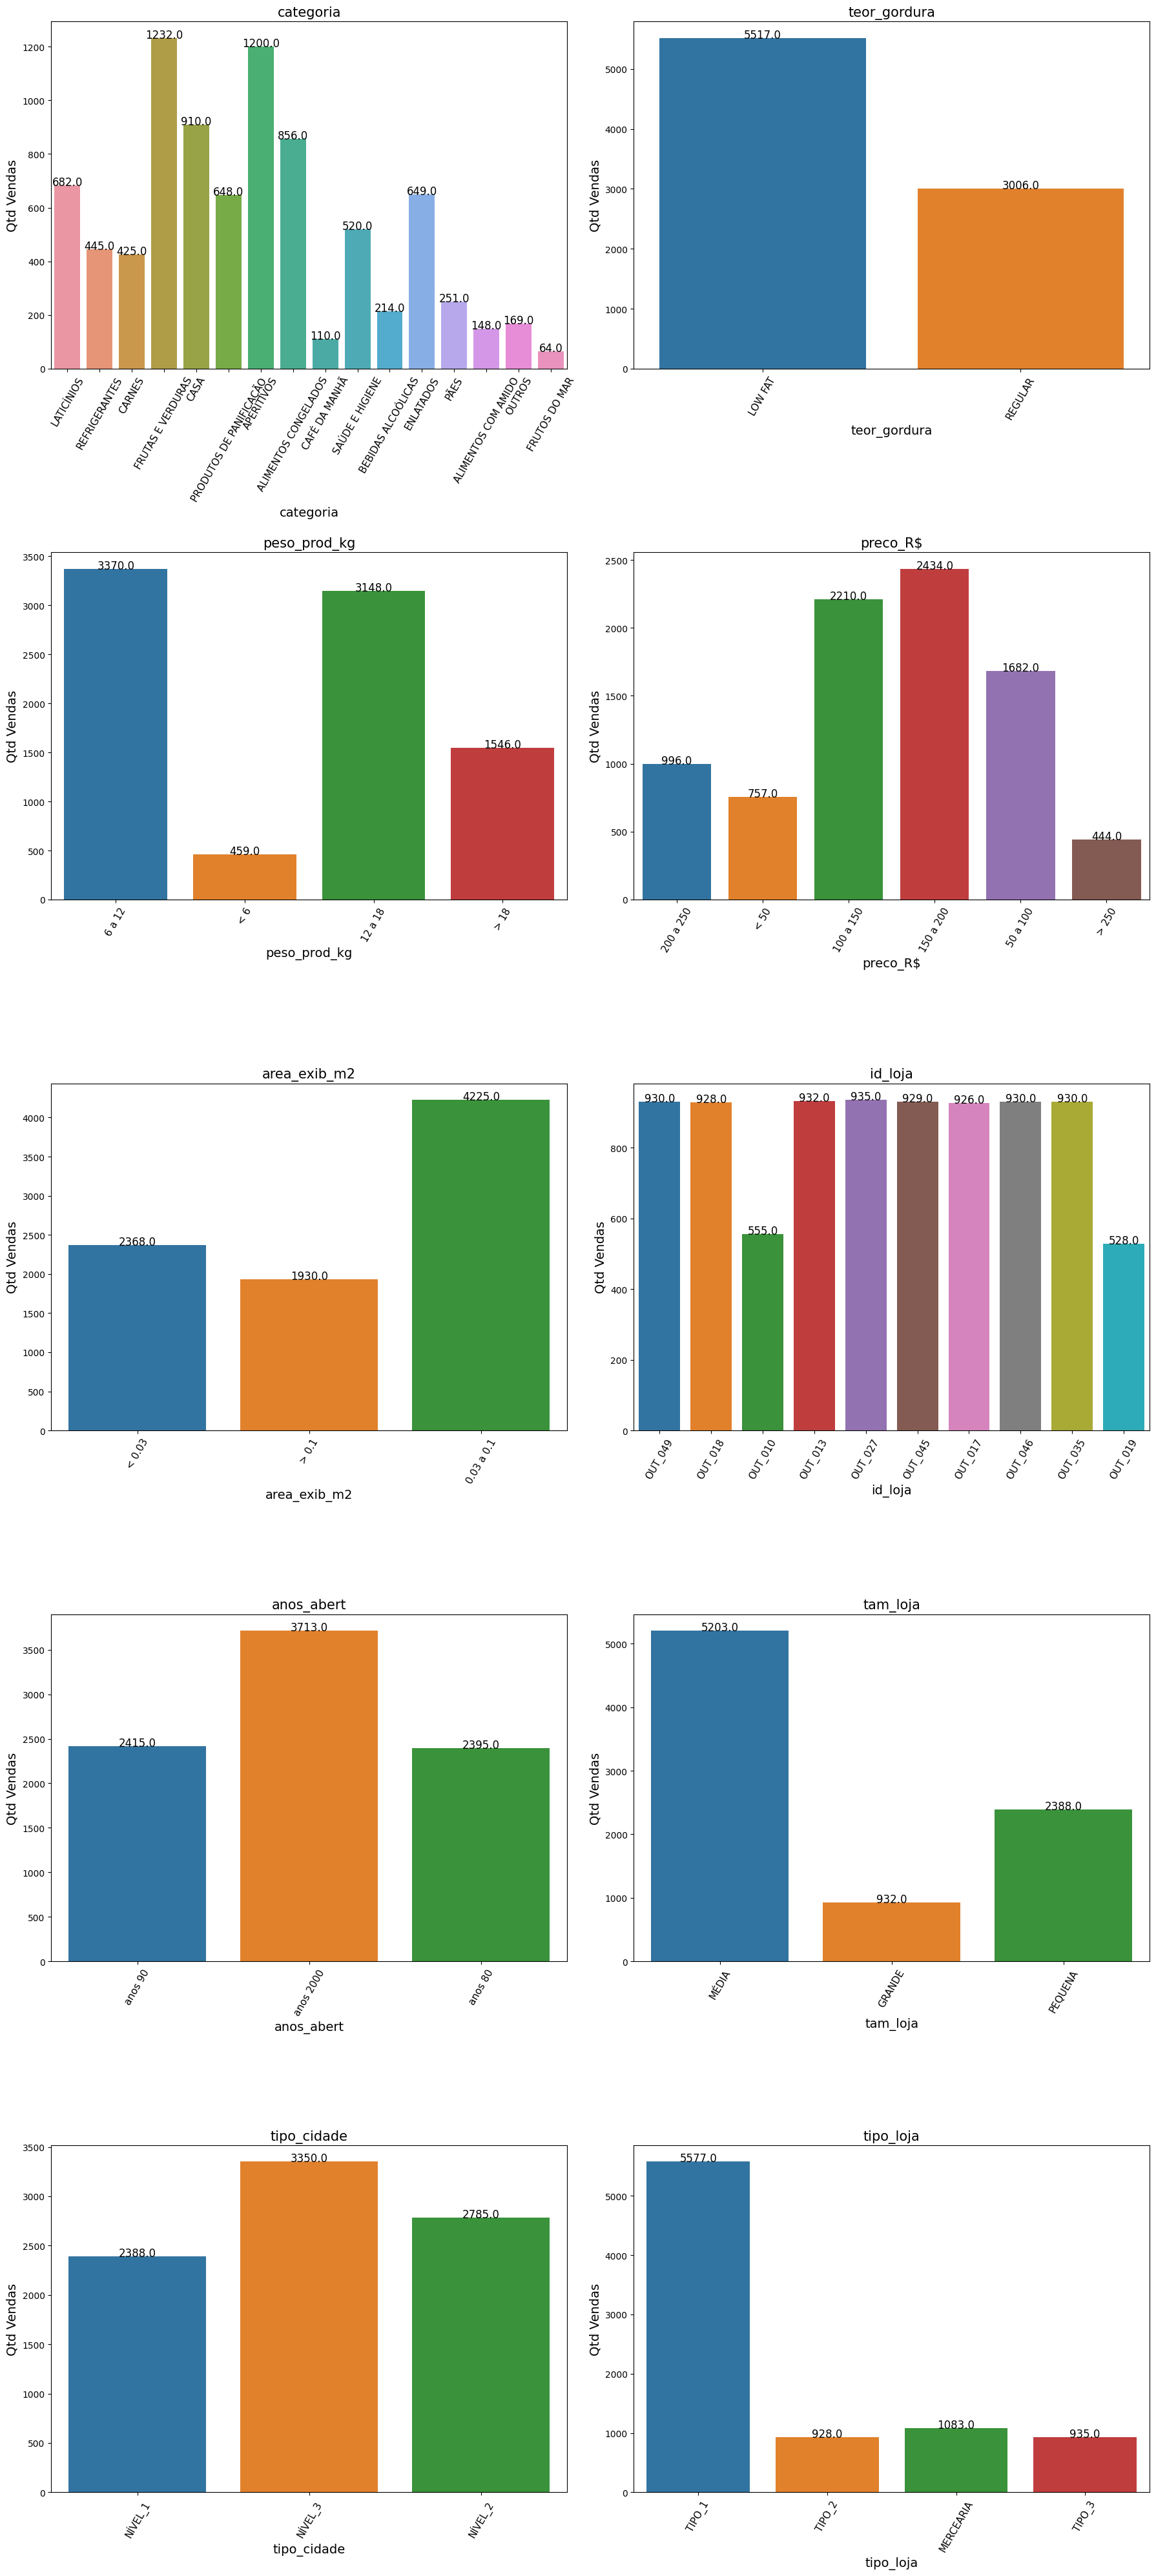

In [47]:
### Gráficos para contagem de registros de colunas categóricas
# tamanho da figura
plt.figure(figsize = (18,40))

# Contador
A = 0

# Loop
for i in df_treino[['categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$','area_exib_m2',
                    'id_loja', 'anos_abert', 'tam_loja', 'tipo_cidade','tipo_loja']].columns:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df_treino.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
        plt.xticks(rotation = 60, size=11)
        plt.xlabel(i, fontsize=14)
        plt.ylabel('Qtd Vendas', fontsize=14)


# Layout
plt.tight_layout(h_pad = 2)


In [48]:
# estatísticas de qtd_vendas
df_treino['qtd_vendas'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: qtd_vendas, dtype: float64

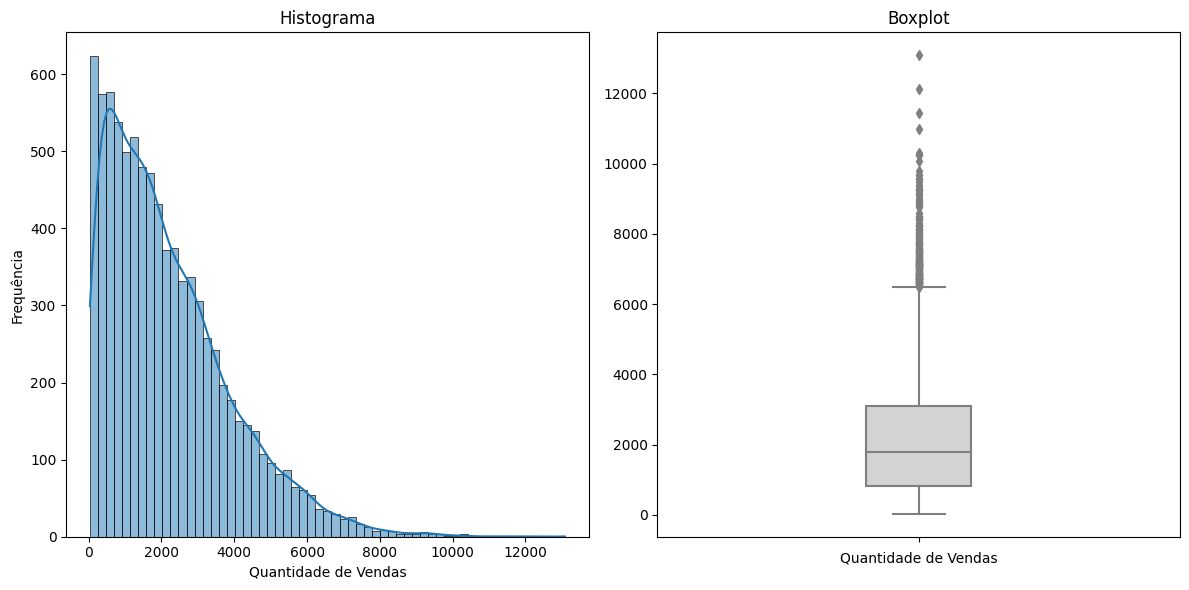

In [49]:
# Avaliar Outliers

# Configurar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o histograma
sns.histplot(data=df_treino, x='qtd_vendas', ax=ax1, kde=True)

# Adicionar título ao histograma
ax1.set_title('Histograma')

# Plotar o boxplot
sns.boxplot(data=df_treino, y='qtd_vendas', ax=ax2, width=0.2, color='lightgray')

# Adicionar título ao boxplot
ax2.set_title('Boxplot')

# Configurar os rótulos e títulos dos eixos
ax1.set_xlabel('Quantidade de Vendas')
ax1.set_ylabel('Frequência')
ax2.set_xlabel('Quantidade de Vendas')
ax2.set_ylabel('')

# Ajustar o espaçamento entre os subplots
fig.tight_layout()

# Exibir a figura
plt.show()

In [50]:
# simular a quantidade de outliers
qtd_outliers = 6200
print('Porcentagem do Dataset Total: ', round(len(df_treino[df_treino['qtd_vendas'] > qtd_outliers]) / len(df_treino) * 100,2),'%')
print('Quantidade de registros: ',len(df_treino[df_treino['qtd_vendas'] > qtd_outliers]))

Porcentagem do Dataset Total:  2.79 %
Quantidade de registros:  238


In [51]:
# dividir dfs de outliers
df_sem_outliers = df_treino[df_treino['qtd_vendas'] < qtd_outliers]
df_de_outliers = df_treino[df_treino['qtd_vendas'] > qtd_outliers]

In [52]:
# refazer os index das linhas
df_sem_outliers = df_sem_outliers.reset_index(drop=True)
df_de_outliers = df_de_outliers.reset_index(drop=True)

In [53]:
print('Peso vendido Total:   ',round(df_treino['qtd_vendas'].sum(),1),'Kg')
print('Peso vendido Outliers: ',round(df_de_outliers['qtd_vendas'].sum(),1),'Kg')
print('Proporção: ',round((df_de_outliers['qtd_vendas'].sum()) / (df_treino['qtd_vendas'].sum())*100,1),'%')

Peso vendido Total:    18591125.4 Kg
Peso vendido Outliers:  1752406.2 Kg
Proporção:  9.4 %


In [54]:
# tamanhos
df_sem_outliers.shape, df_de_outliers.shape

((8285, 12), (238, 12))

In [55]:
# estatísticas sem outliers
df_sem_outliers['qtd_vendas'].describe()

count    8285.000000
mean     2032.434420
std      1471.819465
min        33.290000
25%       805.618000
50%      1733.743200
75%      2969.468000
max      6199.929600
Name: qtd_vendas, dtype: float64

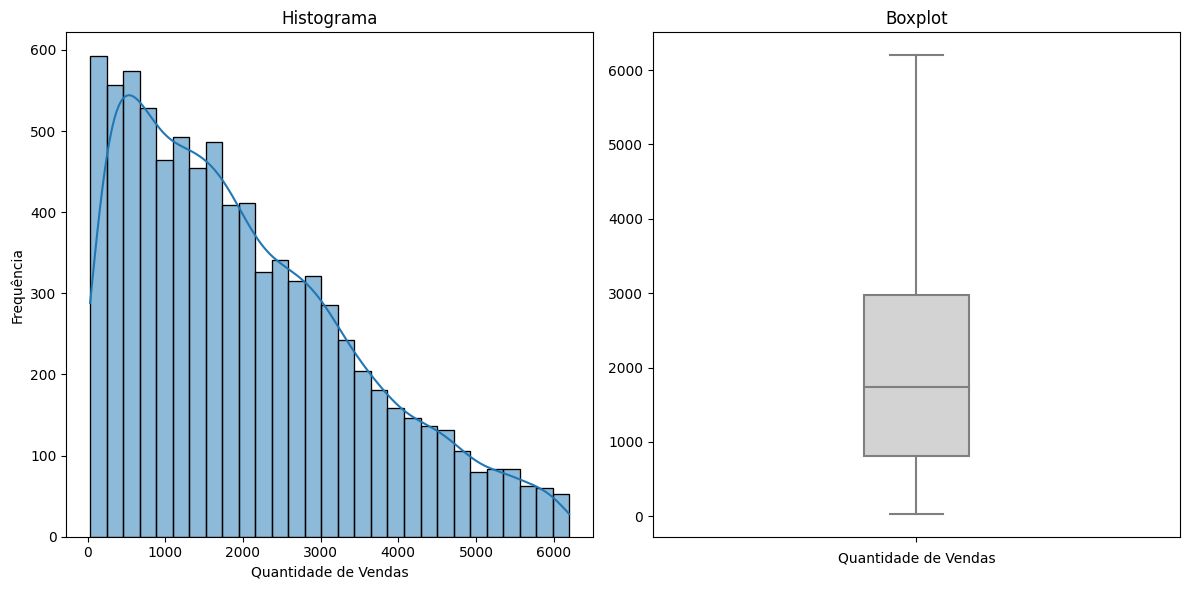

In [56]:
# Avaliar Dataset sem os Outliers

# Configurar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o histograma
sns.histplot(data=df_sem_outliers, x='qtd_vendas', ax=ax1, kde=True)

# Adicionar título ao histograma
ax1.set_title('Histograma')

# Plotar o boxplot
sns.boxplot(data=df_sem_outliers, y='qtd_vendas', ax=ax2, width=0.2, color='lightgray')

# Adicionar título ao boxplot
ax2.set_title('Boxplot')

# Configurar os rótulos e títulos dos eixos
ax1.set_xlabel('Quantidade de Vendas')
ax1.set_ylabel('Frequência')
ax2.set_xlabel('Quantidade de Vendas')
ax2.set_ylabel('')

# Ajustar o espaçamento entre os subplots
fig.tight_layout()
 
# Exibir a figura
plt.show()

In [57]:
# estatísticas dos Outliers
df_de_outliers['qtd_vendas'].describe()

count      238.000000
mean      7363.051428
std       1121.322120
min       6201.927000
25%       6575.940150
50%       7049.157500
75%       7755.404850
max      13086.964800
Name: qtd_vendas, dtype: float64

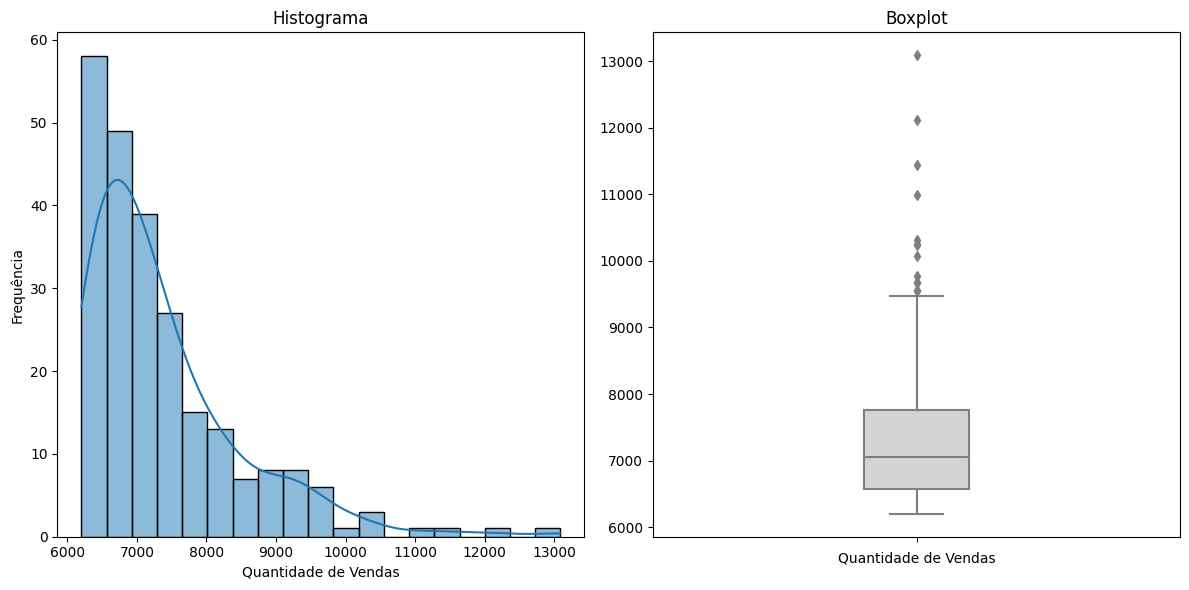

In [58]:
# Avaliar Dataset dos Outliers

# Configurar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o histograma
sns.histplot(data=df_de_outliers, x='qtd_vendas', ax=ax1, kde=True)

# Adicionar título ao histograma
ax1.set_title('Histograma')

# Plotar o boxplot
sns.boxplot(data=df_de_outliers, y='qtd_vendas', ax=ax2, width=0.2, color='lightgray')

# Adicionar título ao boxplot
ax2.set_title('Boxplot')

# Configurar os rótulos e títulos dos eixos
ax1.set_xlabel('Quantidade de Vendas')
ax1.set_ylabel('Frequência')
ax2.set_xlabel('Quantidade de Vendas')
ax2.set_ylabel('')

# Ajustar o espaçamento entre os subplots
fig.tight_layout()

# Exibir a figura
plt.show()

Existe uma quantidade considerável de outliers na variável 'qtd_vendas', que será nossa variável target. Apesar de siginificar somente quase 3% do total de registros, esses registros correspondem a quase 10% do total do peso vendido. Iremos avaliar somente os outliers, em relação a outras variáveis para entender sua importância.

In [59]:
# Colunas
df_de_outliers.columns

Index(['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$',
       'area_exib_m2', 'id_loja', 'anos_abert', 'tam_loja', 'tipo_cidade',
       'tipo_loja', 'qtd_vendas'],
      dtype='object')

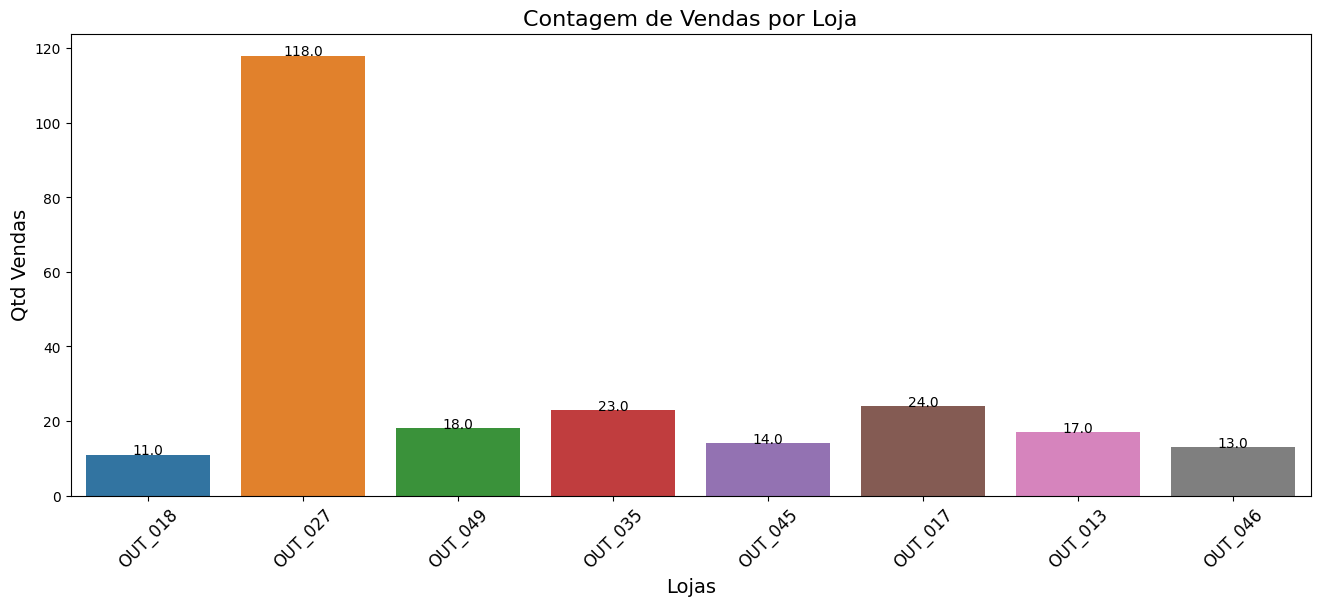

In [60]:
# Quais lojas são responsáveis pelos outliers

# Criar gráfico de barras
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=df_de_outliers, x='id_loja')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Qtd Vendas', fontsize=14)
plt.title('Contagem de Vendas por Loja', fontsize=16)

# Adicionar rótulos nas barras
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha='center', color='black', size=10)

# Ajustar rotação dos rótulos no eixo x, se necessário
plt.xticks(rotation=45, size=12)

# Exibir o gráfico
plt.show()

Em conjunto com a área de negócios, desconsideraremos os outliers para estudo futuro. Cabe um estudo próprio para nova estratégia de fornecimento de grandes quantidades.

In [61]:
# Copiar dataframe de treino
df_treino_SO = df_sem_outliers.copy()

In [62]:
# Amostra
df_treino_SO

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDA_15,LATICÍNIOS,LOW FAT,6 a 12,200 a 250,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,3735.1380
1,DRC_01,REFRIGERANTES,REGULAR,< 6,< 50,< 0.03,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,443.4228
2,FDN_15,CARNES,LOW FAT,12 a 18,100 a 150,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,2097.2700
3,FDX_07,FRUTAS E VERDURAS,REGULAR,> 18,150 a 200,< 0.03,OUT_010,anos 90,MÉDIA,NÍVEL_3,MERCEARIA,732.3800
4,NCD_19,CASA,LOW FAT,6 a 12,50 a 100,< 0.03,OUT_013,anos 80,GRANDE,NÍVEL_3,TIPO_1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8280,FDF_22,APERITIVOS,LOW FAT,6 a 12,200 a 250,0.03 a 0.1,OUT_013,anos 80,GRANDE,NÍVEL_3,TIPO_1,2778.3834
8281,FDS_36,PRODUTOS DE PANIFICAÇÃO,REGULAR,6 a 12,100 a 150,0.03 a 0.1,OUT_045,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,549.2850
8282,NCJ_29,SAÚDE E HIGIENE,LOW FAT,6 a 12,50 a 100,0.03 a 0.1,OUT_035,anos 2000,PEQUENA,NÍVEL_2,TIPO_1,1193.1136
8283,FDN_46,APERITIVOS,REGULAR,6 a 12,100 a 150,> 0.1,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,1845.5976


### Análise Multivariada

In [63]:
# transformar as variáveis categóricas em numéricas para análise de correlação

from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Obter todas as colunas, exceto a última
colunas = df_treino_SO.columns[:-1]

# Iterar sobre as colunas e aplicar o LabelEncoder
for coluna in colunas:
    df_treino_SO[coluna] = label_encoder.fit_transform(df_treino_SO[coluna])

# Exibir o DataFrame após a transformação
df_treino_SO

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,156,10,0,1,2,1,9,2,1,0,1,3735.1380
1,8,14,1,2,4,1,3,0,1,2,2,443.4228
2,662,5,0,0,0,1,9,2,1,0,1,2097.2700
3,1121,8,1,3,1,1,0,2,1,2,0,732.3800
4,1297,6,0,1,3,1,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8280,370,2,0,1,2,0,1,1,0,2,1,2778.3834
8281,897,12,1,1,0,0,7,0,1,1,1,549.2850
8282,1357,15,0,1,3,0,6,0,2,1,1,1193.1136
8283,681,2,1,1,0,2,3,0,1,2,2,1845.5976


In [64]:
df_treino_SO.columns

Index(['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$',
       'area_exib_m2', 'id_loja', 'anos_abert', 'tam_loja', 'tipo_cidade',
       'tipo_loja', 'qtd_vendas'],
      dtype='object')

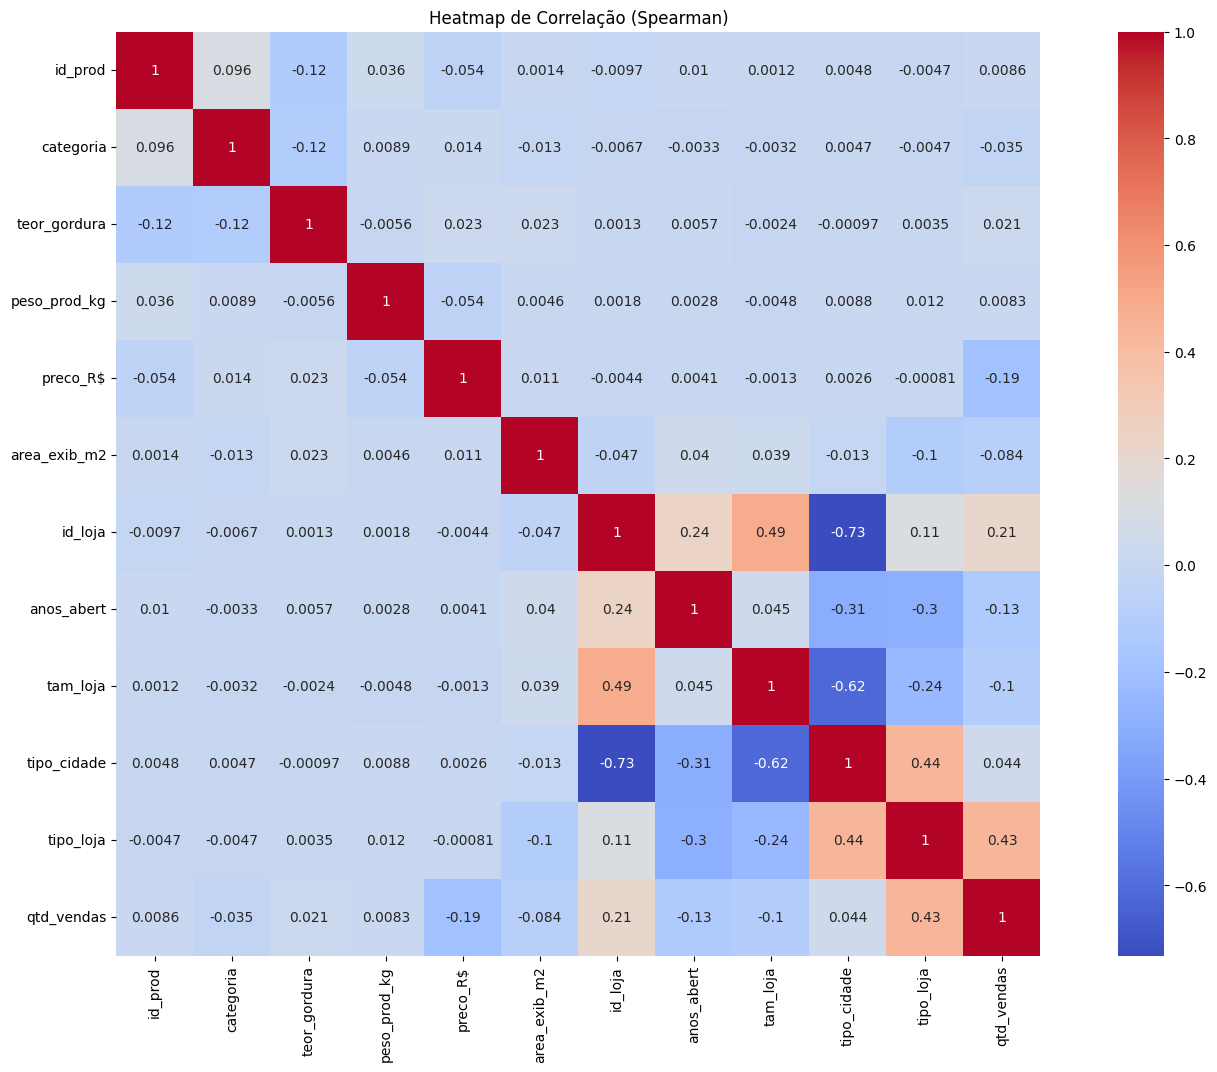

In [65]:
# Calcular a matriz de correlação usando o coeficiente de Spearman
correlation_matrix = df_treino_SO.corr(method='spearman')

# Criar o heatmap de correlação
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap de Correlação (Spearman)')
plt.show()

Conforme análise de correlação acima, podemos observar que poucas variáveis explicama quantidade vendida. Podemos citar as que mais explicam em partes:
- tipo_loja
- tam_loja
- anos_abert
- id_loja
- preço_R$

As demais variáveis, praticamente, não explicam as vendas

## Criação do modelo de previsões

### Algorítimo XGBoost

In [66]:
# importar algoritimos
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

In [67]:
# Separar as variáveis explicativas (X) e a variável target (y)
X = df_treino_SO.drop('qtd_vendas', axis=1)
y = df_treino_SO['qtd_vendas'].values

In [68]:
# Dividir o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# shape
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((6628, 11), (1657, 11), (6628,), (1657,))

In [70]:
# Crie um objeto do modelo XGBoost
modelo = xgb.XGBRegressor(n_estimators=12)

In [71]:
# Treine o modelo usando os dados de treinamento
modelo.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=12, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [72]:
# Fazer as previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

In [73]:
# Calcular o R²
r2 = r2_score(y_teste, y_pred)

# Calcular a média dos erros absolutos (MAE)
mae = mean_absolute_error(y_teste, y_pred)

# Calcular a média dos erros quadráticos (MSE)
mse = mean_squared_error(y_teste, y_pred)

print("R²:", r2)
print("MAE:", mae)
print("MSE:", mse)

R²: 0.5814794094036679
MAE: 700.4666597607813
MSE: 913714.5112128464


### Algorítimo XGBoost com dados em oneHotEncoder

In [74]:
# copiar dataframe
df_treino_SO_one = df_sem_outliers.copy()

In [75]:
# amostra
df_treino_SO_one

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDA_15,LATICÍNIOS,LOW FAT,6 a 12,200 a 250,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,3735.1380
1,DRC_01,REFRIGERANTES,REGULAR,< 6,< 50,< 0.03,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,443.4228
2,FDN_15,CARNES,LOW FAT,12 a 18,100 a 150,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,2097.2700
3,FDX_07,FRUTAS E VERDURAS,REGULAR,> 18,150 a 200,< 0.03,OUT_010,anos 90,MÉDIA,NÍVEL_3,MERCEARIA,732.3800
4,NCD_19,CASA,LOW FAT,6 a 12,50 a 100,< 0.03,OUT_013,anos 80,GRANDE,NÍVEL_3,TIPO_1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8280,FDF_22,APERITIVOS,LOW FAT,6 a 12,200 a 250,0.03 a 0.1,OUT_013,anos 80,GRANDE,NÍVEL_3,TIPO_1,2778.3834
8281,FDS_36,PRODUTOS DE PANIFICAÇÃO,REGULAR,6 a 12,100 a 150,0.03 a 0.1,OUT_045,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,549.2850
8282,NCJ_29,SAÚDE E HIGIENE,LOW FAT,6 a 12,50 a 100,0.03 a 0.1,OUT_035,anos 2000,PEQUENA,NÍVEL_2,TIPO_1,1193.1136
8283,FDN_46,APERITIVOS,REGULAR,6 a 12,100 a 150,> 0.1,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,1845.5976


In [76]:
# importar algoritimos
from sklearn.preprocessing import OneHotEncoder

In [77]:
# Aplicar LabelEncoder na primeira coluna
label_encoder = LabelEncoder()
df_treino_SO_one['id_prod'] = label_encoder.fit_transform(df_treino_SO_one['id_prod'])

# Aplicar OneHotEncoder nas colunas seguintes
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = onehot_encoder.fit_transform(df_treino_SO_one.iloc[:, 1:-1])
encoded_cols_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(df_treino_SO_one.columns[1:-1]))
df_encoded = pd.concat([df_treino_SO_one['id_prod'], encoded_cols_df, df_treino_SO_one['qtd_vendas']], axis=1)

# Exibir o DataFrame final
df_encoded

,id_prod,categoria_ALIMENTOS CONGELADOS,categoria_APERITIVOS,categoria_BEBIDAS ALCOÓLICAS,categoria_CAFÉ DA MANHÃ,categoria_CARNES,categoria_CASA,categoria_ENLATADOS,categoria_FRUTAS E VERDURAS,categoria_FRUTOS DO MAR,...,anos_abert_anos 80,anos_abert_anos 90,tam_loja_MÉDIA,tam_loja_PEQUENA,tipo_cidade_NÍVEL_2,tipo_cidade_NÍVEL_3,tipo_loja_TIPO_1,tipo_loja_TIPO_2,tipo_loja_TIPO_3,qtd_vendas
0,156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3735.1380
1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,443.4228
2,662,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2097.2700
3,1121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,732.3800
4,1297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8280,370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2778.3834
8281,897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,549.2850
8282,1357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1193.1136
8283,681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1845.5976


In [78]:
df_encoded.columns

Index(['id_prod', 'categoria_ALIMENTOS CONGELADOS', 'categoria_APERITIVOS',
       'categoria_BEBIDAS ALCOÓLICAS', 'categoria_CAFÉ DA MANHÃ',
       'categoria_CARNES', 'categoria_CASA', 'categoria_ENLATADOS',
       'categoria_FRUTAS E VERDURAS', 'categoria_FRUTOS DO MAR',
       'categoria_LATICÍNIOS', 'categoria_OUTROS',
       'categoria_PRODUTOS DE PANIFICAÇÃO', 'categoria_PÃES',
       'categoria_REFRIGERANTES', 'categoria_SAÚDE E HIGIENE',
       'teor_gordura_REGULAR', 'peso_prod_kg_6 a 12', 'peso_prod_kg_< 6',
       'peso_prod_kg_> 18', 'preco_R$_150 a 200', 'preco_R$_200 a 250',
       'preco_R$_50 a 100', 'preco_R$_< 50', 'preco_R$_> 250',
       'area_exib_m2_< 0.03', 'area_exib_m2_> 0.1', 'id_loja_OUT_013',
       'id_loja_OUT_017', 'id_loja_OUT_018', 'id_loja_OUT_019',
       'id_loja_OUT_027', 'id_loja_OUT_035', 'id_loja_OUT_045',
       'id_loja_OUT_046', 'id_loja_OUT_049', 'anos_abert_anos 80',
       'anos_abert_anos 90', 'tam_loja_MÉDIA', 'tam_loja_PEQUENA',
       

In [79]:
import re
import unicodedata

def normalize_text(text):
    # Remove acentos
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    # Remove caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)
    # Converte para letras minúsculas
    text = text.lower()
    # Remove espaços
    text = re.sub(r'\s+', '_', text)
    return text

# Renomear as colunas
df_encoded = df_encoded.rename(columns=lambda x: normalize_text(x))

In [80]:
df_encoded.columns

Index(['id_prod', 'categoria_alimentos_congelados', 'categoria_aperitivos',
       'categoria_bebidas_alcoolicas', 'categoria_cafe_da_manha',
       'categoria_carnes', 'categoria_casa', 'categoria_enlatados',
       'categoria_frutas_e_verduras', 'categoria_frutos_do_mar',
       'categoria_laticinios', 'categoria_outros',
       'categoria_produtos_de_panificacao', 'categoria_paes',
       'categoria_refrigerantes', 'categoria_saude_e_higiene',
       'teor_gordura_regular', 'peso_prod_kg_6_a_12', 'peso_prod_kg__6',
       'peso_prod_kg__18', 'preco_r_150_a_200', 'preco_r_200_a_250',
       'preco_r_50_a_100', 'preco_r__50', 'preco_r__250', 'area_exib_m2__003',
       'area_exib_m2__01', 'id_loja_out_013', 'id_loja_out_017',
       'id_loja_out_018', 'id_loja_out_019', 'id_loja_out_027',
       'id_loja_out_035', 'id_loja_out_045', 'id_loja_out_046',
       'id_loja_out_049', 'anos_abert_anos_80', 'anos_abert_anos_90',
       'tam_loja_media', 'tam_loja_pequena', 'tipo_cidade_nivel_2

In [81]:
# Separar as variáveis explicativas (X) e a variável target (y)
X2 = df_encoded.drop('qtd_vendas', axis=1)
y2 = df_encoded['qtd_vendas'].values

In [82]:
# Dividir o conjunto de dados em treino e teste
X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [83]:
# shape
X2_treino.shape, X2_teste.shape, y2_treino.shape, y2_teste.shape

((6628, 45), (1657, 45), (6628,), (1657,))

In [84]:
# Crie um objeto do modelo XGBoost
modelo2 = xgb.XGBRegressor(n_estimators=12)

In [85]:
# Treine o modelo usando os dados de treinamento
modelo2.fit(X2_treino, y2_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=12, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [86]:
# Fazer as previsões no conjunto de teste
y2_pred = modelo2.predict(X2_teste)

In [87]:
# Calcular o R²
r2_2 = r2_score(y2_teste, y2_pred)

# Calcular a média dos erros absolutos (MAE)
mae2 = mean_absolute_error(y2_teste, y2_pred)

# Calcular a média dos erros quadráticos (MSE)
mse2 = mean_squared_error(y2_teste, y2_pred)

print("R²2:", r2)
print("MAE2:", mae)
print("MSE2:", mse)

R²2: 0.5814794094036679
MAE2: 700.4666597607813
MSE2: 913714.5112128464


### Algorítimo Regressão Linear

In [88]:
# importar algoritimo
from sklearn.linear_model import LinearRegression

In [89]:
# amostra dos dados com labelEncoder
df_treino_SO

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,156,10,0,1,2,1,9,2,1,0,1,3735.1380
1,8,14,1,2,4,1,3,0,1,2,2,443.4228
2,662,5,0,0,0,1,9,2,1,0,1,2097.2700
3,1121,8,1,3,1,1,0,2,1,2,0,732.3800
4,1297,6,0,1,3,1,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8280,370,2,0,1,2,0,1,1,0,2,1,2778.3834
8281,897,12,1,1,0,0,7,0,1,1,1,549.2850
8282,1357,15,0,1,3,0,6,0,2,1,1,1193.1136
8283,681,2,1,1,0,2,3,0,1,2,2,1845.5976


In [90]:
# Crie um objeto do modelo Regressão
modelo3 = LinearRegression()

In [91]:
# Treinar o modelo usando os dados
modelo3.fit(X_treino, y_treino)

LinearRegression()

In [92]:
# Fazer as previsões no conjunto de teste
y3_pred = modelo.predict(X_teste)

In [93]:
# Calcular o R²
r2_3 = r2_score(y_teste, y3_pred)

# Calcular a média dos erros absolutos (MAE)
mae3 = mean_absolute_error(y_teste, y3_pred)

# Calcular a média dos erros quadráticos (MSE)
mse3 = mean_squared_error(y_teste, y3_pred)

print("R²3:", r2)
print("MAE3:", mae)
print("MSE3:", mse)

R²3: 0.5814794094036679
MAE3: 700.4666597607813
MSE3: 913714.5112128464


Podemos afirmar que, de acordo modelos criados, as variáveis explicam aproximadamente somente 60% do do volume de vendas. Precisaríamos de mais dados para completar e explicar de forma mais plausível as previsões que iremos fazer.

## Previsões

In [94]:
# amostra
df_previsao

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja,qtd_vendas
0,FDW_58,APERITIVOS,LOW FAT,> 18,100 a 150,< 0.03,OUT_049,anos 90,MÉDIA,NÍVEL_1,TIPO_1,NaN
1,FDW_14,LATICÍNIOS,REGULAR,6 a 12,50 a 100,0.03 a 0.1,OUT_017,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN
2,NCN_55,OUTROS,LOW FAT,12 a 18,200 a 250,0.03 a 0.1,OUT_010,anos 90,MÉDIA,NÍVEL_3,MERCEARIA,NaN
3,FDQ_58,APERITIVOS,LOW FAT,6 a 12,150 a 200,< 0.03,OUT_017,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN
4,FDY_38,LATICÍNIOS,REGULAR,12 a 18,200 a 250,> 0.1,OUT_027,anos 80,MÉDIA,NÍVEL_3,TIPO_3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB_58,APERITIVOS,REGULAR,6 a 12,100 a 150,< 0.03,OUT_046,anos 90,PEQUENA,NÍVEL_1,TIPO_1,NaN
5677,FDD_47,ALIMENTOS COM AMIDO,REGULAR,6 a 12,150 a 200,> 0.1,OUT_018,anos 2000,MÉDIA,NÍVEL_3,TIPO_2,NaN
5678,NCO_17,SAÚDE E HIGIENE,LOW FAT,6 a 12,100 a 150,0.03 a 0.1,OUT_045,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN
5679,FDJ_26,ENLATADOS,REGULAR,12 a 18,200 a 250,< 0.03,OUT_017,anos 2000,MÉDIA,NÍVEL_2,TIPO_1,NaN


In [95]:
# excluir ultima coluna
df_previsao = df_previsao.drop(df_previsao.columns[-1], axis=1)

In [96]:
df_previsao_prev = df_previsao.copy()

In [97]:
# Criar uma instância do LabelEncoder
label_encoder_prev = LabelEncoder()

# Iterar sobre as colunas e aplicar o LabelEncoder
for coluna in df_previsao_prev:
    df_previsao_prev[coluna] = label_encoder.fit_transform(df_previsao_prev[coluna])

# Exibir o DataFrame após a transformação
df_previsao_prev

,id_prod,categoria,teor_gordura,peso_prod_kg,preco_R$,area_exib_m2,id_loja,anos_abert,tam_loja,tipo_cidade,tipo_loja
0,1103,2,0,3,0,1,9,2,1,0,1
1,1067,10,1,1,3,0,2,0,1,1,1
2,1406,11,0,0,2,0,0,2,1,2,0
3,809,2,0,1,1,1,2,0,1,1,1
4,1184,10,1,0,2,2,5,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,2,1,1,0,1,8,2,2,0,1
5677,306,0,1,1,1,2,3,0,1,2,2
5678,1412,15,0,1,0,0,7,0,1,1,1
5679,517,7,1,0,2,1,2,0,1,1,1


In [98]:
# Fazer as previsões no conjunto de teste
y_prev = modelo.predict(df_previsao_prev)

In [99]:
# inserir previsões na base de previsão
df_previsao['venda_prevista_kg'] = y_prev

In [100]:
# colunas
df_previsao.columns

Index(['id_prod', 'categoria', 'teor_gordura', 'peso_prod_kg', 'preco_R$',
       'area_exib_m2', 'id_loja', 'anos_abert', 'tam_loja', 'tipo_cidade',
       'tipo_loja', 'venda_prevista_kg'],
      dtype='object')

In [102]:
# tabela de previsão de vendas por item de produto e por loja
df_previsao[['id_prod', 'id_loja', 'venda_prevista_kg']].sort_values(['id_prod', 'id_loja']).reset_index(drop=True)

,id_prod,id_loja,venda_prevista_kg
0,DRA_12,OUT_027,2928.897705
1,DRA_12,OUT_046,2002.823853
2,DRA_12,OUT_049,1990.055298
3,DRA_24,OUT_018,2764.480957
4,DRA_24,OUT_045,2382.131348
...,...,...,...
5676,NCZ_53,OUT_045,2684.233398
5677,NCZ_53,OUT_046,2712.202881
5678,NCZ_54,OUT_013,2719.354980
5679,NCZ_54,OUT_017,2691.385498


A tabela acima fornece informações de previsão de vendas por item de produto e por loja

## Fim